This notebook outlines the results from the subset selection analysis performed using two different approaches.  

__Recapitulation of intersubject correlations__:

The rationale for this analysis is as follows:  One can conceive one of the goals of our project as finding the subset of tests that best captures the variance across subjects across the entire set of variables. That is: What subset of variables would let one best recapitulate the individual differences observed in the sample.  To assess this, we took all possible subsets of 8 tasks from the full dataset (32 choose 8, which is about 10 million) and for each of these subsets computed the correlation matrix across subjects using the reduced dataset.  Then, we computed the correlation between the upper triangle of this matrix with the upper triangle of the same matrix computed from the full dataset.  The point is to find which set of tasks could most effectively recapitulate the observed pattern of individual differences.  This analysis was performed on the TACC Wrangler cluster using discovery_task_analyses/task_subjectsim_prediction.py in the repo.

The notebook below loads the data saved on Wrangler and does some summary analyses on them.

In [1]:

import os,glob,sys,itertools
import numpy,pandas
import pickle 
import json
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline


# this is kludgey but it works
sys.path.append('../utils')
from utils import get_info,get_behav_data

dataset=get_info('dataset')
print('using dataset:',dataset)
basedir=get_info('base_directory')
derived_dir=os.path.join(basedir,'Data/Derived_Data/%s'%dataset)
data=pandas.read_csv(os.path.join(derived_dir,'taskdata_clean_cutoff3.00IQR_imputed.csv'))
# get task names and indicator
tasknames=[i.split('.')[0] for i in data.columns]
tasks=list(set(tasknames))
tasks.sort()
taskpresence=numpy.zeros(len(tasks))

allcombs=[i for i in itertools.combinations(range(32),8)]



using dataset: Discovery_10-14-2016


Grab the highest correlations (according to the threshold set in the call to scipy.stats.scoreatpercentile) and then sort those.

In [2]:
#load correlations and get top 1%
def get_sorted_cc(infile,cutoff=99.99):
    cc=numpy.load(infile)
    foo=plt.hist(cc,100)
    thresh=scipy.stats.scoreatpercentile(cc,cutoff)
    print('thresh=',thresh)
    goodcc=[c for i,c in enumerate(cc) if c>thresh]
    print('%d observations'%len(goodcc))
    goodcombs=numpy.array([allcombs[i] for i,c in enumerate(cc) if c>thresh])
    goodcc_idx=numpy.argsort(goodcc)[::-1]

    return cc,goodcc,goodcombs,goodcc_idx



Print best combination of tasks

thresh= 0.741287891138
1052 observations
best combination: r =  0.766267439822
4 columbia_card_task_cold
10 dot_pattern_expectancy
13 information_sampling_task
16 local_global_letter
23 simon
26 stop_signal
27 stroop
28 threebytwo



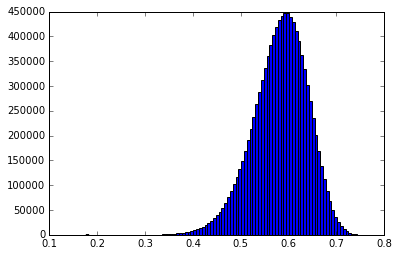

In [20]:
cc,goodcc,goodcombs,goodcc_idx=get_sorted_cc('cc.npy')
print('best combination: r = ',goodcc[goodcc_idx[0]])
for i in goodcombs[goodcc_idx[0]]:
    print(i,tasks[i])
print('')


There are a couple of ways to assess different tasks. The first is to look across all anlayses and compute the correlation between task presence and subset correlation - that is, how is the presence/absence of a task linearly related to the goodness of recapitulation?

In [4]:
taskcc=numpy.zeros(len(tasks))
print('this will take a moment')
for i,task in enumerate(tasks):
    t_in=[]
    for j in allcombs:
        if i in j:
            t_in.append(1)
        else:
            t_in.append(0)
    taskcc[i]=numpy.corrcoef(t_in,cc)[0,1]



this will take a moment


In [5]:
print('Correlation between task presence and subject correlation reconstruction')
taskcc_idx=numpy.argsort(taskcc)[::-1]
df=pandas.DataFrame({'corr':taskcc[taskcc_idx]},index=[tasks[i] for i in taskcc_idx])
display(df)

Correlation between task presence and subject correlation reconstruction


,corr
threebytwo,0.379497
stroop,0.302971
dot_pattern_expectancy,0.275297
simon,0.263146
stop_signal,0.175442
choice_reaction_time,0.157613
attention_network_task,0.150598
local_global_letter,0.139369
information_sampling_task,0.124053
motor_selective_stop_signal,0.105813


Print tasks that show up most often across the top selections.

In [6]:
nvars=numpy.zeros(len(tasks))

for i,task in enumerate(tasks):
    taskpresence[i]=numpy.mean(goodcombs==i)
    nvars[i]=len([t for j,t in enumerate(tasknames) if t==task])
taskidx=numpy.argsort(taskpresence)[::-1]
df=pandas.DataFrame({'nvars':[nvars[i] for i in taskidx],'proportion present':taskpresence[taskidx]},index=[tasks[i] for i in taskidx])
print('Proportion present across all combinations')
display(df)

Proportion present across all combinations


,nvars,proportion present
threebytwo,10.0,0.125000
dot_pattern_expectancy,10.0,0.116207
stroop,6.0,0.109078
simon,6.0,0.086027
information_sampling_task,6.0,0.070342
local_global_letter,9.0,0.067134
tower_of_london,5.0,0.061906
stop_signal,7.0,0.057391
attention_network_task,6.0,0.055014
columbia_card_task_cold,5.0,0.050261


Now look at the results from the anlaysis in which the full correlation matrix was based on all subjects.

thresh= 0.535004398639
1052 observations
best combination: r =  0.551929650255
4 columbia_card_task_cold
10 dot_pattern_expectancy
13 information_sampling_task
23 simon
26 stop_signal
27 stroop
28 threebytwo
29 tower_of_london

this will take a moment
Correlation between task presence and subject correlation reconstruction


,corr
threebytwo,0.374367
stroop,0.253261
simon,0.241039
dot_pattern_expectancy,0.217356
information_sampling_task,0.170293
choice_reaction_time,0.164972
stop_signal,0.157698
attention_network_task,0.149629
tower_of_london,0.134057
adaptive_n_back,0.127633


Proportion present across all combinations


,nvars,proportion present
threebytwo,10.0,0.125000
stroop,6.0,0.104800
dot_pattern_expectancy,10.0,0.101117
information_sampling_task,6.0,0.086264
simon,6.0,0.079848
tower_of_london,5.0,0.071768
columbia_card_task_cold,5.0,0.067966
attention_network_task,6.0,0.054777
stop_signal,7.0,0.053232
adaptive_n_back,4.0,0.046697


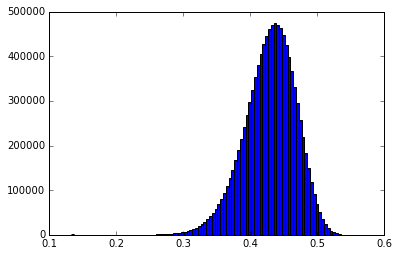

In [21]:
cc,goodcc,goodcombs,goodcc_idx=get_sorted_cc('cc_allvars.npy')
print('best combination: r = ',goodcc[goodcc_idx[0]])
for i in goodcombs[goodcc_idx[0]]:
    print(i,tasks[i])
print('')


taskcc=numpy.zeros(len(tasks))
print('this will take a moment')
for i,task in enumerate(tasks):
    t_in=[]
    for j in allcombs:
        if i in j:
            t_in.append(1)
        else:
            t_in.append(0)
    taskcc[i]=numpy.corrcoef(t_in,cc)[0,1]


print('Correlation between task presence and subject correlation reconstruction')
taskcc_idx=numpy.argsort(taskcc)[::-1]
df=pandas.DataFrame({'corr':taskcc[taskcc_idx]},index=[tasks[i] for i in taskcc_idx])
display(df)

nvars=numpy.zeros(len(taskidx))

for i,task in enumerate(tasks):
    taskpresence[i]=numpy.mean(goodcombs==i)
    nvars[i]=len([t for j,t in enumerate(tasknames) if t==task])
taskidx=numpy.argsort(taskpresence)[::-1]
df=pandas.DataFrame({'nvars':[nvars[i] for i in taskidx],'proportion present':taskpresence[taskidx]},index=[tasks[i] for i in taskidx])
print('Proportion present across all combinations')
display(df)


    

__Data reconstruction__:

Here the goal is slightly different from above:  Instead of trying to recapitulate the intersubject correlations from the subset of variables, we try to reconstruct the full task data matrix from a subset of the variables.  For each subset of tasks, we fit a regression model that takes the data matrix on the subset as the design matrix, and the full data (including the subset) as the dependent variable.   We tested using both linear and nonlinear (kernel ridge with polynomial kernel) regression methods.  We use 4-fold cross-validation to fit the regression model to subsets of the subjects and predict to the left-out subjects, in order to assess the predictive validity in an out-of-sample manner.  

Due to the complexity of this analysis compared to the previous one, we were not able to easily run all 32-choose-8 combinations, so we used a genetic algorithm to perform search across the possible combinations.  This works as follows:

* Choose an intial population of 1000 task sets at random from the set of all possible combinations
* For each task set, compute its "fitness" (which in the simplest case is defined by the correlation between the true data and the out-of-sample predicted data).
* Select the 10% of sets with the highest fitness and discard the rest.
* Generate random pairs of survivors, and create two offsping for each pair by randomly mixing their tasks (with the constraint that each task can only appear once).  
* Choose a set of "immigrants" at random from the set of all possible combinations, and add them to the population.
* For a small number of population members (1%), perform "mutation" by replacing one of their tasks with a randomly selected task that is not currently in their set.

We do this repeatedly until the set of chosen tasks is stable for 10 generations. In each case, we also run the optimization multiple times to confirm that it gives stable results across runs.

best tasks selected using linear regression
2 attention_network_task
5 columbia_card_task_hot
8 directed_forgetting
10 dot_pattern_expectancy
13 information_sampling_task
16 local_global_letter
17 motor_selective_stop_signal
28 threebytwo


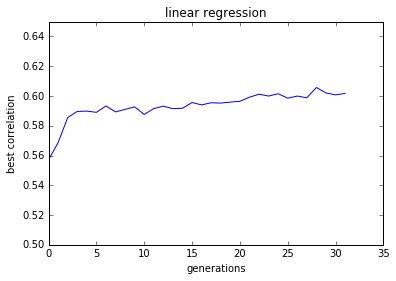

In [17]:
bestp_all,ccmax=pickle.load(open('ga_results_linear.pkl','rb'))

bestp=bestp_all[len(bestp_all)-1]
bestp.sort()
print('best tasks selected using linear regression')
for i in bestp:
    print(i,tasks[i])
plt.plot(ccmax)
plt.ylim([0.5,0.65])
plt.xlabel('generations')
plt.ylabel('best correlation')
plt.title('linear regression')

best tasks selected using kernel ridge regression
2 attention_network_task
5 columbia_card_task_hot
8 directed_forgetting
10 dot_pattern_expectancy
13 information_sampling_task
16 local_global_letter
26 stop_signal
28 threebytwo


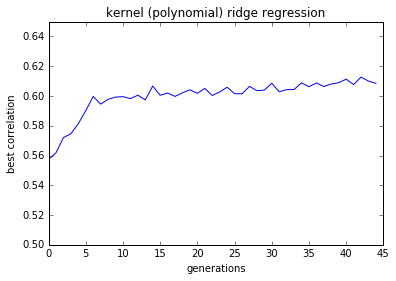

In [19]:
bestp_all,ccmax=pickle.load(open('ga_results_kridge.pkl','rb'))

bestp=bestp_all[len(bestp_all)-1]
bestp.sort()
print('best tasks selected using kernel ridge regression')
for i in bestp:
    print(i,tasks[i])
plt.plot(ccmax)
plt.ylim([0.5,0.65])
plt.xlabel('generations')
plt.ylabel('best correlation')
plt.title('kernel (polynomial) ridge regression')

__Multi-objective optimization__

Using the genetic algorithm, we can also try to jointly optimize on a number of variables (e.g. [Konak et al., Multi-objective optimization using genetic algorithms: A tutorial](http://dx.doi.org/10.1016/j.ress.2005.11.018)). We use a simple weighted-based approach, where we simply take a weighted average of each of the individual objective functions (after z-scoring to prevent effects of differential scaling).  In this case, we are using the objectives of maximal reconstruction of intersubject correlations and maximal reconstruction of the full data matrix, as in the two examples above.

In [23]:
bestp_all,ccmax=pickle.load(open('multiobj_results_kridge.pkl','rb'))

bestp=bestp_all[len(bestp_all)-1]
bestp.sort()
print('best tasks selected using multi-objective with kernel ridge regression')
for i in bestp:
    print(i,tasks[i])


best tasks selected using multi-objective with kernel ridge regression
1 angling_risk_task_always_sunny
5 columbia_card_task_hot
10 dot_pattern_expectancy
13 information_sampling_task
16 local_global_letter
17 motor_selective_stop_signal
28 threebytwo
29 tower_of_london
